# Wrangle And Analyze Data

## Introduction

An executive summary of my data wrangling and my analysis are available:

* wrangle_report.html: briefly describes my wrangling efforts.
* act_report.html: communicates the insights and displays the visualizations produced from my wrangled data.

**Objective**: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for analyses and visualizations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import statsmodels.api as sm
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.display import display
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# WeRateDogs twitter archive
df = pd.read_csv('twitter-archive-enhanced.csv')

# Image predictions
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
'''
# I've commented this out now that I've generated the file,
# it took 30+ minutes to run so no need to do it again!

# Import my Twitter API keys from separate file
%run twitter-api.py

# Use Twitter API to fetch metadata for tweet_ids
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID 
# in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a 
# .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run 
    # because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

# Extended tweet info from Twitter API
df_tweets = pd.read_json('tweet_json.txt', lines=True)

## Assess

In [5]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13,10,Eli,None,None,None,None
2103,670676092097810432,NaN,NaN,2015-11-28 18:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloo. He's a Westminster Cîroc. Doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670676092...,8,10,Bloo,None,None,None,None
1752,678969228704284672,NaN,NaN,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678969228...,11,10,Lola,None,None,None,None
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@JODYHiGHROLLER it may be an 11/10 but what do...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
463,817423860136083457,NaN,NaN,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
1033,745074613265149952,NaN,NaN,2016-06-21 02:03:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Jeffrey. He wasn't prepared to execute...,NaN,NaN,NaN,https://vine.co/v/iQm3JAXuFmv,11,10,Jeffrey,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Observations:**
    
* Columns that refer to replies and retweets do not have a lot of data
* The extracted numerator/denominator columns do not seem to be very accurate

In [7]:
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,Eskimo_dog,0.595665,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
219,670079681849372674,https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg,1,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False


In [8]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Observations:**

* The dog breeds predicted have varying letter casing (e.g. 'Rhodesian_ridgeback' - initial uppercase - vs. 'bloodhound' - all lowercase)
* Several of the predictions are not dogs (e.g. I saw 'shopping_cart' and 'box_turtle')
* The confidence of the predictions in `p2*` and `p3*` are not very high, especially when the `p1` prediction is of a dog.

In [9]:
# Visual inspection of extended tweet metadata
df_tweets.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
806,NaN,NaN,2016-08-29 01:22:47,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 770069132691795970, 'id_str'...",7926,False,Say hello to Carbon. This is his first time sw...,NaN,...,NaN,NaN,NaN,NaN,2446,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1768,NaN,NaN,2015-12-17 19:07:09,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677565708809695232, 'id_str'...",1328,False,Contortionist pup here. Inside pentagram. Clea...,NaN,...,NaN,NaN,NaN,NaN,477,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1335,NaN,NaN,2016-02-28 02:29:55,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 703769060060884992, 'id_str'...",3396,False,When you're trying to watch your favorite tv s...,NaN,...,NaN,NaN,NaN,NaN,1195,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
760,NaN,NaN,2016-09-14 23:30:38,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776201512041189376, 'id_str'...",10078,False,This is O'Malley. That is how he sleeps. Doesn...,NaN,...,NaN,NaN,NaN,NaN,2703,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1596,NaN,NaN,2016-01-08 03:50:03,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685307443652472833, 'id_str'...",2145,False,Say hello to Petrick. He's an Altostratus Floo...,NaN,...,NaN,NaN,NaN,NaN,463,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1587,NaN,NaN,2016-01-09 04:34:45,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2100,False,Jack deserves another round of applause. If yo...,NaN,...,NaN,NaN,NaN,NaN,132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
393,NaN,NaN,2017-01-24 02:28:08,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Balto. He's very conten...,NaN,...,NaN,NaN,NaN,NaN,12001,False,{'created_at': 'Thu Oct 06 15:49:14 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1580,NaN,NaN,2016-01-10 04:04:10,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1200,False,Yes I do realize a rating of 4/20 would've bee...,NaN,...,NaN,NaN,NaN,NaN,127,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1133,NaN,NaN,2016-04-29 00:21:01,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 725842282449125380, 'id_str'...",7246,False,This is Colby. He's currently regretting all t...,NaN,...,NaN,NaN,NaN,NaN,2769,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
597,NaN,NaN,2016-11-11 02:35:32,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Tyrone. He's a leaf wiz...,NaN,...,NaN,NaN,NaN,NaN,9612,False,{'created_at': 'Wed Jan 13 16:56:30 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

**Observations:**

A [data dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html) is available on Twitter's developer website.

* The `contributors`, `coordinates`, and `geo` have missing data (and `place` only has 1 value)
* Columns that refer to replies and retweets are also sparse
* Some columns contain JSON data (e.g. `entities`)
* After reviewing Twitter's documentation, there are several other columns we do not use in our analysis:
  * `id_str`: string representation of the id
  * `truncated`: whether the tweet was truncated (almost always false)
  * `possibly_sensitive`: url might have sensitive content (almost always false)
  * `possibly_sensitive_appealable`: url might have sensitive content (almost always false)
  * `display_text_range`: helps Twitter clients handle extended tweet lengths
  * `favorited`: whether the tweet was favorited by the authenticated user (me) - not to be confused with `favorite_count` (how many times it was favorited by all users)
  * `retweeted`: whether the tweet was RT'd by the authenticated user (me) - not to be confused with `retweet_count` (how many times it was RT'd by all users)
  * `entities` and `extended_entities`: these are JSON values containing extended information about media connected with the tweet. I'm not going to analyze them so I won't be needing them.

In [11]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
df_tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2337.000000,0.0,2.337000e+03,2.337000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2337.000000
mean,NaN,NaN,7837.055627,NaN,7.420692e+17,7.420692e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2875.462131
std,NaN,NaN,12147.185494,NaN,6.824243e+16,6.824243e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4857.524783
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1360.000000,NaN,6.783345e+17,6.783345e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,579.000000
50%,NaN,NaN,3417.000000,NaN,7.185406e+17,7.185406e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1344.000000
75%,NaN,NaN,9597.000000,NaN,7.986825e+17,7.986825e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3352.000000
max,NaN,NaN,162019.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82408.000000


In [14]:
# Check for duplicate rows
print(df['tweet_id'].duplicated().any())
print(df_img['tweet_id'].duplicated().any())
print(df_tweets['id'].duplicated().any())

False
False
False



The requirements of this project are to assess and clean **at least 8 quality issues** and **at least 2 tidiness issues** in this dataset.

**Quality issues** are identified:

* Indexes on the three different data sets don't match
* Empty and unneeded columns should be eliminated
* Datatypes need to be corrected
* Some tweets don't have images and/or ratings
* The doggie stages are spread across four columns and not normalized
* Ratings are spread between two numerator and denominator columns and should be in a single column, also the existing numerator/denominator values don't appear to be accurate compared to the tweet text
* Image predictions have inconsistent casing (mix of uppercase and lowercase)
* Image predictions are spread across three columns and should be in a single column

And the following **tidyness issues**:

* A single, merged dataframe should be created
* For convenience, I'd like a single column that sums all "social signals" a tweet received from other users (retweets and favorites) 

## Clean
### Quality Issue: Change indexes

**Define**

All three datasets have metadata about individual tweets. The best index is Twitter's tweet_id. Setting the index to the same value for all three datasets will make merging and combining easier and reduce errors. 

**Code**

In [15]:
df_new=df.copy()

In [16]:
# First I will need to rename df_tweets 'id' to 'tweet_id' to match the other dataframes
df_tweets.rename(columns={"id": "tweet_id"}, inplace=True)

**Test**

In [17]:
df_tweets['tweet_id'].head(5)

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

### Tidyness Issue: Merge the three different datasets into one dataframe

**Define**

Now that they all share an index, it's easy to merge them into one dataframe. The merge process will create some duplicate columns (ones that appear in more than one dataframe) so I'll need to clean that as well.

I'm creating a new dataframe with the combined data called `df_clean`.

**Code**

In [18]:
# Join the image predictions
df_clean = df_new.merge(df_img, on= 'tweet_id',how = 'inner')

# Join the extended tweet data
df_clean = df_clean.merge(df_tweets,on= 'tweet_id', how = 'inner')

# Now drop the duplicated columns (ending in '_x')
df_clean = df_clean.drop(df_clean.filter(regex='_x').columns, axis=1)

**Test**

In [19]:
df_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,NaN,NaN,NaN,8182,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,NaN,NaN,NaN,NaN,6053,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,NaN,NaN,NaN,NaN,4004,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,NaN,NaN,NaN,8324,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,NaN,NaN,NaN,NaN,9032,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality Issue: Remove empty and unneeded columns

**Define**

In the instructions, I noticed "You only want original ratings (no retweets)." Looking at the dataset, I see the `retweeted_status_id` is present only for retweets. That's the best way to detect and ultimate eliminate rows that refer to retweets.

**Code**

In [20]:
df_clean.retweeted_status_id.nunique()

75

In [21]:
# Remove any row where there's a value in retweeted_status_id (it's a retweet)
df_clean = df_clean.query('retweeted_status_id == "NaN"')

In [22]:
df_clean.retweeted_status_id.unique()

array([ nan])

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 56 columns):
tweet_id                         1990 non-null int64
timestamp                        1990 non-null object
text                             1990 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1990 non-null object
rating_numerator                 1990 non-null int64
rating_denominator               1990 non-null int64
name                             1990 non-null object
doggo                            1990 non-null object
floofer                          1990 non-null object
pupper                           1990 non-null object
puppo                            1990 non-null object
jpg_url                          1990 non-null object
img_num                          1990 non-null int64
p1                               1990 no

In [24]:
# We can drop the columns that are only relevant for retweets and replies
df_clean = df_clean.drop(df_clean.filter(regex='retweeted_status').columns,axis=1)
df_clean = df_clean.drop(df_clean.filter(regex='in_reply_to_').columns, axis=1)
df_clean = df_clean.drop(df_clean.filter(regex='quoted_status').columns,axis=1)

# Let's also drop the other unused columns that we found above
df_clean.drop([
    'contributors', 'coordinates', 'display_text_range', 'geo', 'place',
    'id_str', 'truncated', 'possibly_sensitive',
    'possibly_sensitive_appealable', 'favorited', 'retweeted', 'entities',
    'extended_entities', 'is_quote_status'
],
        axis=1,inplace=True)

**Test**

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 29 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
doggo                 1990 non-null object
floofer               1990 non-null object
pupper                1990 non-null object
puppo                 1990 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null int64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null bool
p3                    1990 non-null object
p3_conf               1990 non-null flo

### Quality Issue: Correct data types

**Define**

I noticed that the `timestamp` column is treated as a string but should be a Python datetime value. I'm planning to do some analysis by date, so I'll need to correct that.

**Code**

In [26]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

**Test**

In [27]:
df_clean.timestamp.dtype

dtype('<M8[ns]')

### Quality Issue: Make sure all tweets have images and ratings

**Define**

As the instructions, "You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."

**Code**

Done

**Test**

In [28]:
df_clean.jpg_url.isnull().sum()

0

In [29]:
df_clean.rating_denominator.isnull().sum()

0

### Quality Issue: Doggie stage columns are spread across four columns and not normalized

**Define**

WeRateDogs uses four "stages" – doggo, floofer, pupper, and puppo. These columns contain None or their string as a value. We'll need to unify them into one colummn.

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 29 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null datetime64[ns]
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
doggo                 1990 non-null object
floofer               1990 non-null object
pupper                1990 non-null object
puppo                 1990 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null int64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null bool
p3                    1990 non-null object
p3_conf               1990 non-

In [31]:
df_clean['doggo'] = df_clean['doggo'].replace('None', '')
df_clean['floofer'] = df_clean['floofer'].replace('None', '')
df_clean['pupper'] = df_clean['pupper'].replace('None', '')
df_clean['puppo'] = df_clean['puppo'].replace('None', '')

df_clean['doggie_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [32]:
df_clean['doggie_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [33]:
df_clean['doggie_stage'] = df_clean['doggie_stage'].replace({
    'doggopuppo':
    'doggo,puppo',
    'doggofloofer':
    'doggo,floofer',
    'doggopupper':
    'doggo,pupper'
})

**Test**

In [34]:
df_clean.doggie_stage.value_counts()

                 1684
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: doggie_stage, dtype: int64

In [35]:
df_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'],axis=1,inplace=True)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 26 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null datetime64[ns]
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null int64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null bool
p3                    1990 non-null object
p3_conf               1990 non-null float64
p3_dog                1990 non-null bool
created_at            1990 non-null datetime64[ns]
favorite_count        1990 non-null int64
full_text             199

### Quality Issue: Add numeric rating column

**Define**

The denominator for WeRateDogs is usually larger than the numerator (12/10). I'll make a new numeric column that represents the decimal version of the rating so I can compare them. I noticed in my visual inspection that the numerator/denominator columns have quality issues, so I'll attempt to repopulate them from the tweet text.

**Code**

In [37]:
# Use a regex to extract from the tweet text into two new
#columns - nnum (new numerator), and nden (new denominator)
df_clean[['nnum','nden']] = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)

In [38]:
# Convert the columns to int
df_clean['nnum'] = pd.to_numeric(df_clean['nnum'])
df_clean['nden'] = pd.to_numeric(df_clean['nden'])

In [39]:
# Now let's look at any columns where my new denominator doesn't
# agree with rating_denominator

with pd.option_context('display.max_colwidth', 280):
    print(df_clean.loc[(df_clean['rating_numerator'] != df_clean['nnum'])][['text', 'nnum', 'nden']])

                                                                                                                                                                   text  \
40                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
551                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
607   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1444                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

       nnum  nden  
40    13.50    10  
551    9.75    10  
607   11.27    10  
1444  11.26    10  


There were four rows need to fix

In [40]:
# Drop the old (bad) numerator and denominator columns
df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [41]:
df_clean.rename(columns={'nnum': 'rating_numerator','nden': 'rating_denominator'},inplace=True)

In [42]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

**Test**

In [43]:
df_clean.rating.describe()

count    1990.000000
mean        1.164805
std         4.068382
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Quality Issue: Image prediction breeds have inconsistent casing

**Define**

I see that the image prediction strings are mixed-case (some begin with capital letters, others with lowercase). Converting them all to lowercase.

**Code**

In [44]:
# Convert p1, p2, p3 columns to lowercase
for c in ['p1', 'p2', 'p3']:
    df_clean[c] = df_clean[c].str.lower()

**Test**

In [45]:
df_clean.p1.value_counts().head(10)

golden_retriever      139
labrador_retriever     93
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
toy_poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

### Quality Issue: Image predictions are spread across three columns and should be in a single column

We'll probably need to pick a confidence level, let's take a look at the ranges.

In [46]:
df_clean[['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog','p3_conf']].head()

,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf
0,orange,False,0.097049,bagel,False,0.085851,banana,False,0.076110
1,chihuahua,True,0.323581,pekinese,True,0.090647,papillon,True,0.068957
2,chihuahua,True,0.716012,malamute,True,0.078253,kelpie,True,0.031379
3,paper_towel,False,0.170278,labrador_retriever,True,0.168086,spatula,False,0.040836
4,basset,True,0.555712,english_springer,True,0.225770,german_short-haired_pointer,True,0.175219


In [47]:
df_clean.query('p1_dog == True').p1_conf.describe()

count    1473.000000
mean        0.613623
std         0.260163
min         0.044333
25%         0.391471
50%         0.615678
75%         0.850050
max         0.999956
Name: p1_conf, dtype: float64

The median confidence level is 0.616.

In [48]:
df_clean.query('p1_dog == True and p1_conf > 0.4')[['p1', 'p1_conf']].count()

p1         1089
p1_conf    1089
dtype: int64

Text(0,0.5,'Number of rows')

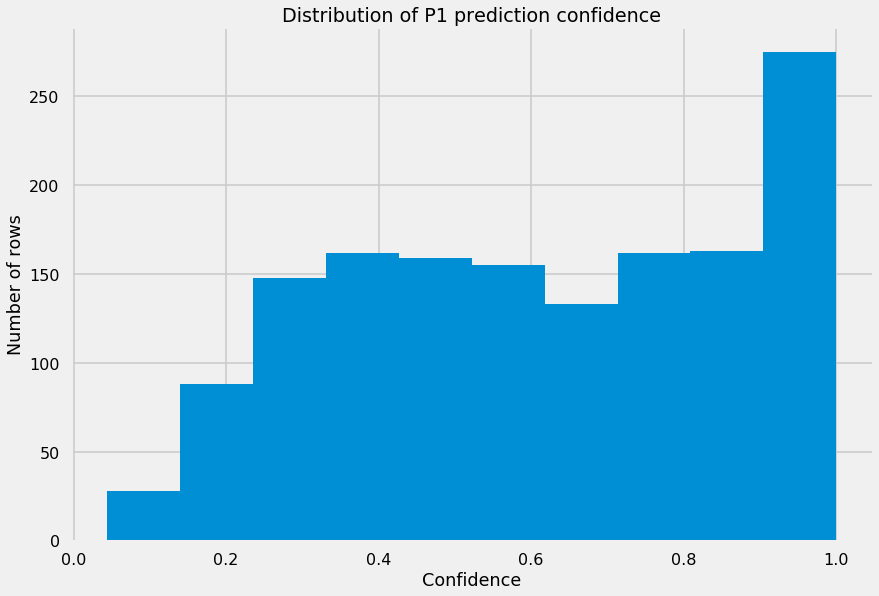

In [49]:
# Histogram of confidence scores for the p1 prediction
plt.hist(df_clean.query('p1_dog == True')['p1_conf'])
plt.title("Distribution of P1 prediction confidence")
plt.xlabel("Confidence")
plt.ylabel("Number of rows")

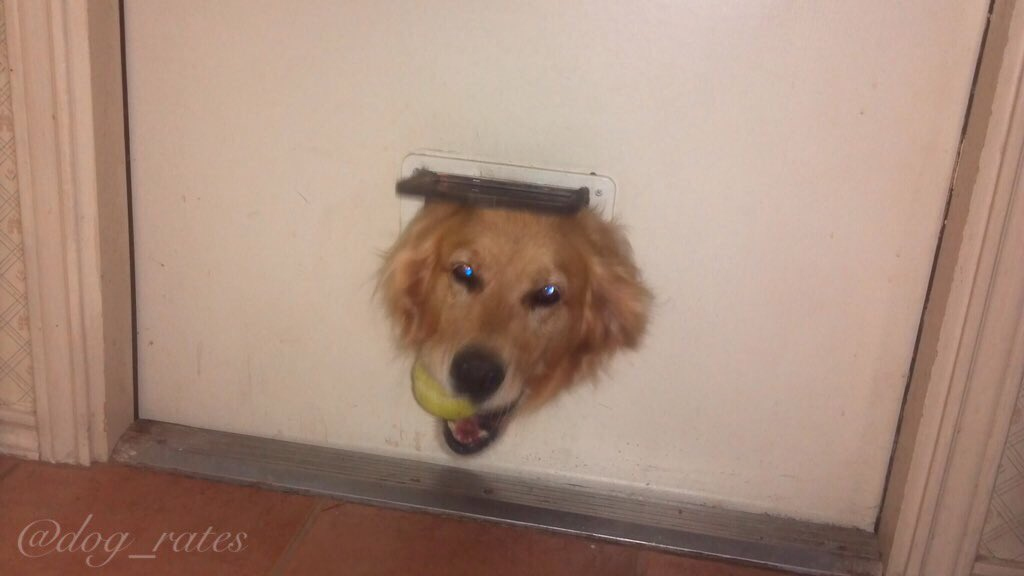

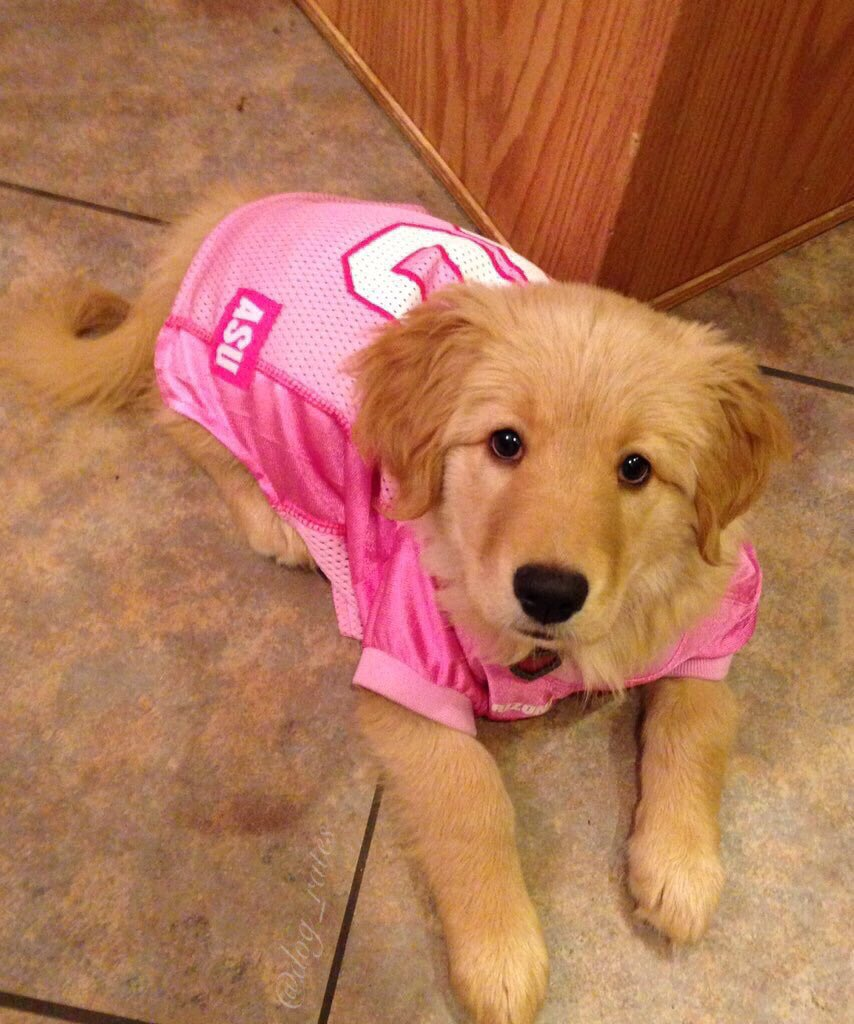

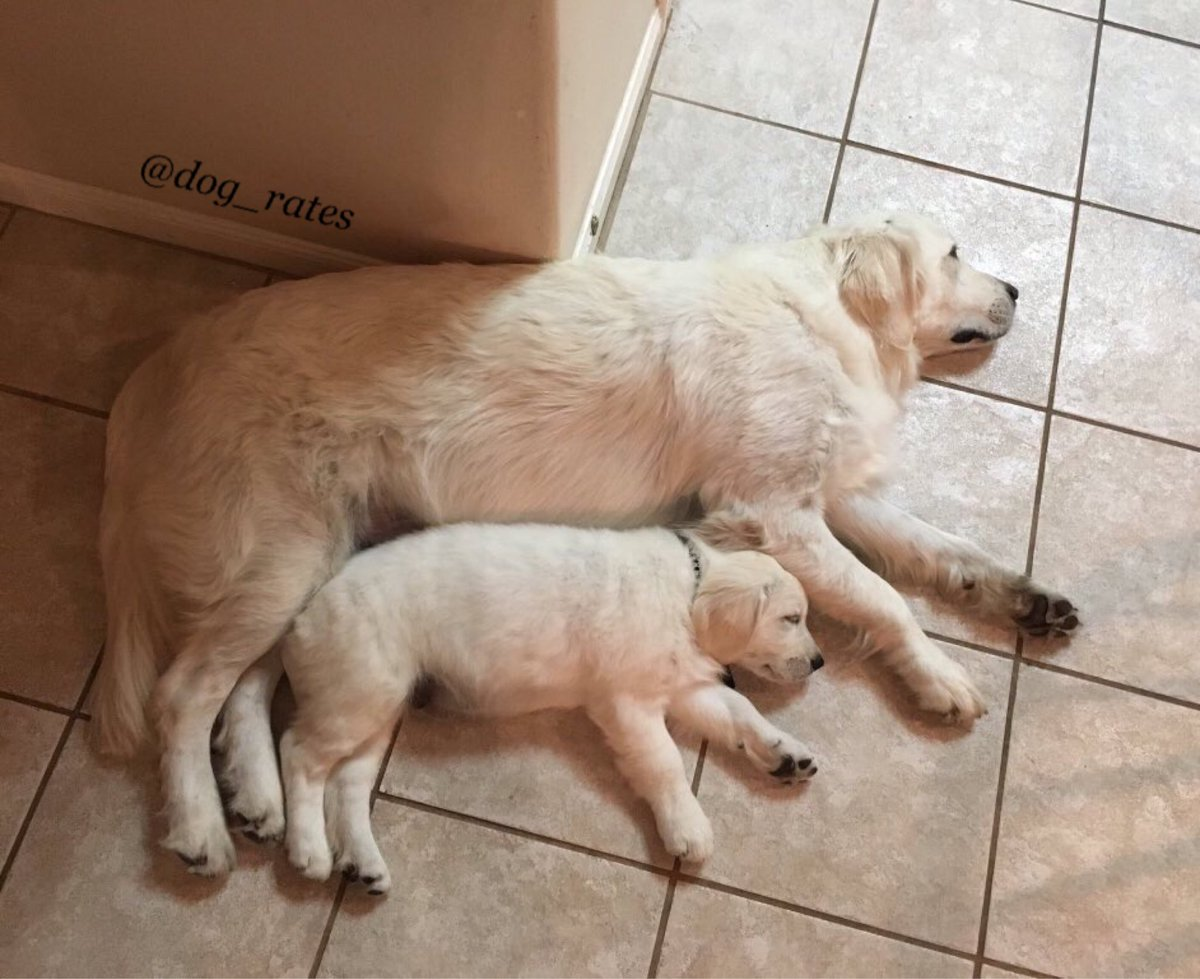

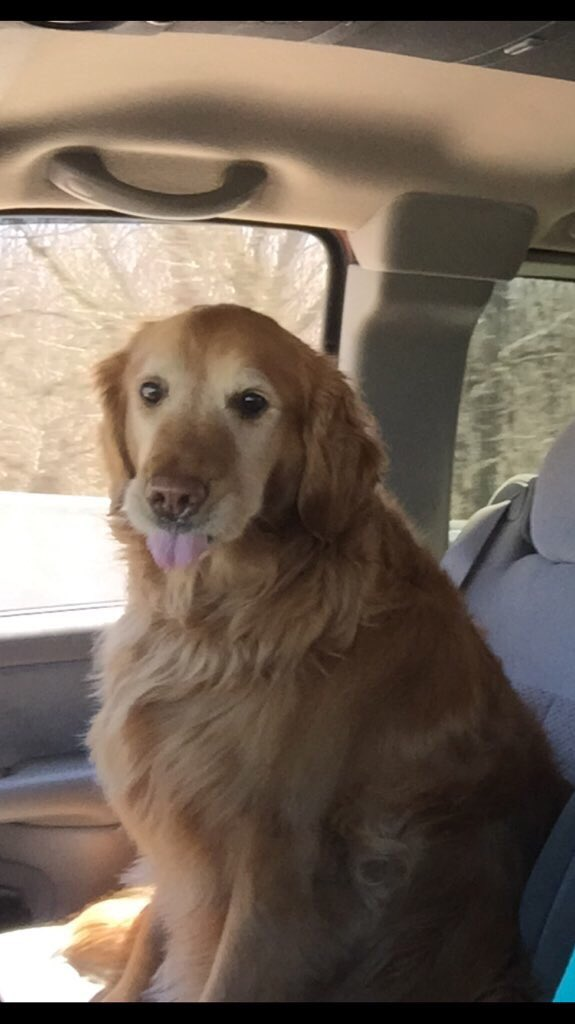

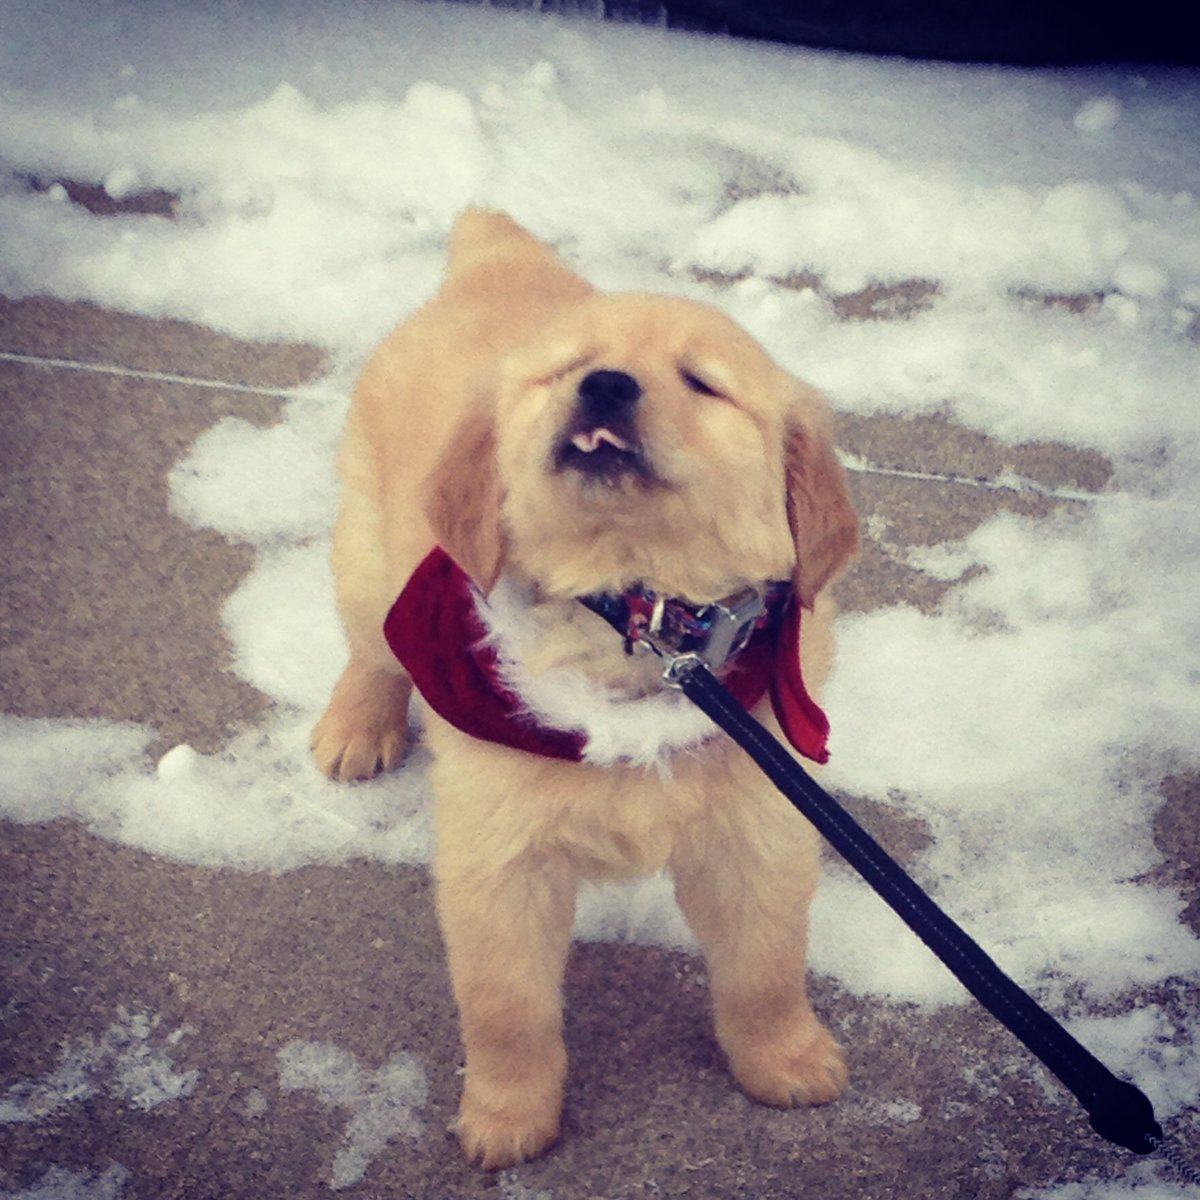

In [50]:
# Pick 10 random golden retrievers at 0.4 confidence
images = df_clean.query('p1 == "golden_retriever" and p1_conf > 0.4').sample(n=5)

# Display the images
for i, j in images.iterrows():
    img = Image(url=j['jpg_url'], format='jpg', width=200, embed=True)
    display(img)

Those all look like golden retrievers!

Then I'll drop the `p2*` and `p3*` columns – the neural network's #1 prediction should be good enough for us. 

In [51]:
df_clean['breed'] = np.where(
(df_clean['p1_dog'] == True) & (df_clean['p1_conf'] > 0.4), df_clean['p1'],
    None)

In [52]:
df_clean.drop(['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3',
               'p3_dog','p3_conf'],axis=1,inplace=True)

**Test**

In [53]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,img_num,created_at,favorite_count,full_text,lang,retweet_count,source_y,user,doggie_stage,rating_numerator,rating_denominator,rating,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01 16:23:56,37511,This is Phineas. He's a mystical boy. Only eve...,en,8182,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01 00:17:27,32240,This is Tilly. She's just checking pup on you....,en,6053,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31 00:18:03,24293,This is Archie. He is a rare Norwegian Pouncin...,en,4004,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,12.0,10,1.2,chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017-07-30 15:58:51,40854,This is Darla. She commenced a snooze mid meal...,en,8324,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017-07-29 16:00:24,39059,This is Franklin. He would like you to stop ca...,en,9032,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,12.0,10,1.2,basset


### Tidyness Issue: Make a new "social total" column

I'm going to be looking at the patterns of retweets and favorites for individual tweets, so I'll create a new combined derived column called `social_total` that equals the sum of `favorite_count` and `retweet_count` so I don't need to keep having to perform this arithmetic.

**Code**

In [54]:
df_clean['social_total'] = df_clean['favorite_count'] + df_clean['retweet_count']

## Final data

In [55]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [56]:
df_clean

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,img_num,created_at,favorite_count,full_text,lang,retweet_count,source_y,user,doggie_stage,rating_numerator,rating_denominator,rating,breed,social_total
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01 16:23:56,37511,This is Phineas. He's a mystical boy. Only eve...,en,8182,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None,45693
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01 00:17:27,32240,This is Tilly. She's just checking pup on you....,en,6053,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None,38293
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31 00:18:03,24293,This is Archie. He is a rare Norwegian Pouncin...,en,4004,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,12.0,10,1.2,chihuahua,28297
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017-07-30 15:58:51,40854,This is Darla. She commenced a snooze mid meal...,en,8324,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None,49178
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017-07-29 16:00:24,39059,This is Franklin. He would like you to stop ca...,en,9032,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,12.0,10,1.2,basset,48091
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,2017-07-29 00:08:17,19628,Here we have a majestic great white breaching ...,en,2997,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,chesapeake_bay_retriever,22625
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,2017-07-28 16:27:12,11468,Meet Jax. He enjoys ice cream so much he gets ...,en,1984,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,None,13452
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,2017-07-28 00:22:40,63301,When you watch your owner call another dog a g...,en,18175,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,pomeranian,81476
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,2017-07-27 16:25:51,27000,This is Zoey. She doesn't want to be one of th...,en,4118,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",,13.0,10,1.3,irish_terrier,31118
9,890240255349198849,2017-07-26 15:59:51,This is Ca

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 20 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null datetime64[ns]
text                  1990 non-null object
expanded_urls         1990 non-null object
name                  1990 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null int64
created_at            1990 non-null datetime64[ns]
favorite_count        1990 non-null int64
full_text             1990 non-null object
lang                  1990 non-null object
retweet_count         1990 non-null int64
source_y              1990 non-null object
user                  1990 non-null object
doggie_stage          1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null int64
rating                1990 non-null float64
breed                 1089 non-null object
social_total          1990 non-null int64
dtypes: datetime64[n

In [58]:
df_clean.describe()

,img_num,favorite_count,retweet_count,rating_numerator,rating_denominator,rating,social_total
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,1.203015,8586.705025,2604.044724,12.237578,10.533166,1.164805,11190.749749
std,0.561001,12608.318323,4653.325303,41.512839,7.328029,4.068382,17020.643528
min,1.000000,76.000000,11.000000,0.000000,2.000000,0.000000,87.000000
25%,1.000000,1848.250000,582.250000,10.000000,10.000000,1.000000,2466.000000
50%,1.000000,3880.500000,1249.500000,11.000000,10.000000,1.100000,5133.000000
75%,1.000000,10700.500000,2965.750000,12.000000,10.000000,1.200000,13714.250000
max,4.000000,162019.000000,82408.000000,1776.000000,170.000000,177.600000,244427.000000


In [59]:
df_clean.to_csv('twitter_archive_master.csv')

## Analysis

 Provide **at least three (3) insights** and **one (1) visualization**.

### Question: Has WeRateDogs' popularity (social feedback) changed over time?

In [60]:
# Resample our df so we have monthly average totals
df2 = df_clean.set_index('timestamp')
df2 = df2.resample('M').mean()

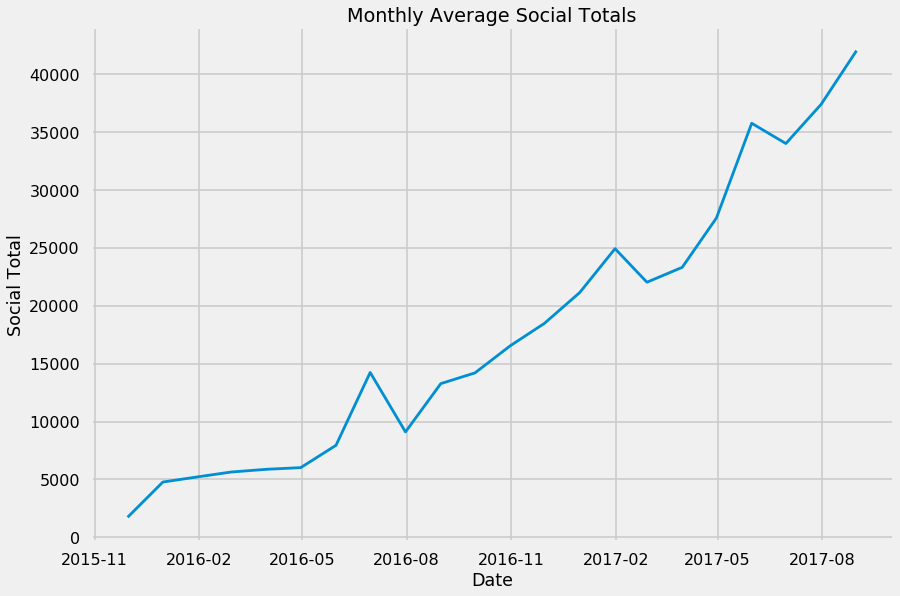

In [61]:
plt.plot(df2.index, df2['social_total'])
plt.title("Monthly Average Social Totals")
plt.xlabel("Date")
plt.ylabel("Social Total")
plt.show()

We see that WeRateDogs' average social feedback per tweet has increased significantly as the account has become more popular. We see the same effect if we look at *total* social feedback (a sum of all RTs+tweets for all tweets in a given month).

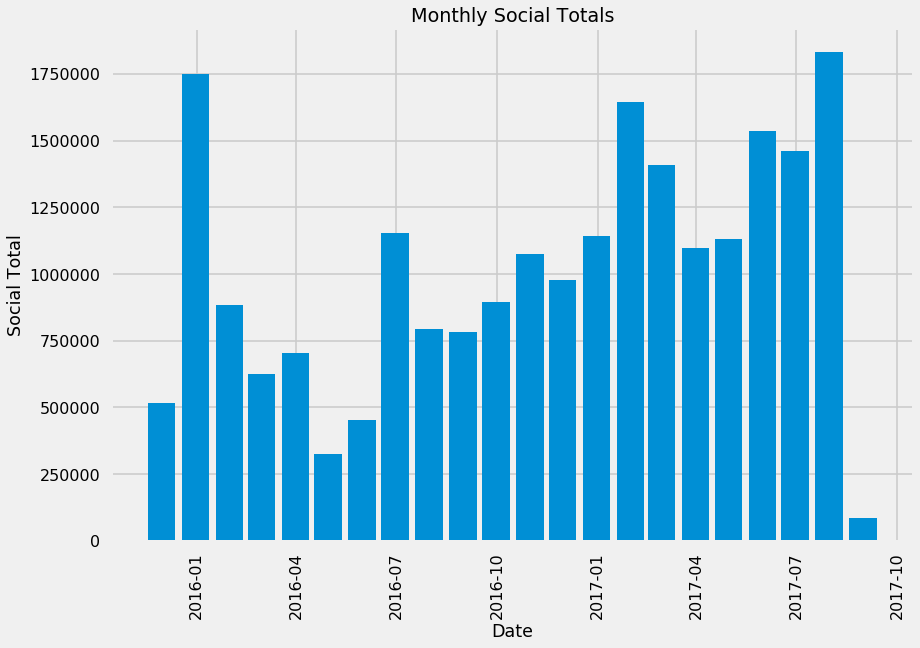

In [62]:
df2 = df_clean.set_index('timestamp')
df2 = df2.resample('M').sum()
plt.bar(df2.index, df2['social_total'], width=25)
plt.xticks(rotation=90)
plt.title("Monthly Social Totals")
plt.xlabel("Date")
plt.ylabel("Social Total")
plt.show()

We do notice a significant drop-off in the last month of our dataset. I suspect this is due to incomplete data from a partial month. The data for 01-2016 is extremely high, it may come from data skewness. 

### Question: Do certain dog breeds get more social feedback?

On Twitter, there are several different ways for tweets to receive feedback from other users. The most prominent are favorites (likes) and retweets. When users retweet, they share the tweet with their own followers, bringing it to a new audience and promoting virality.

Above I created a new column called `social_total` that sums retweets and favorites. I was operating under the assumption that the two values are correlated. Before proceeding, let's test that assumption.

In [63]:
# Are favorites and RT's correlated?
df_clean['favorite_count'].corr(df_clean['retweet_count'])

0.92958966136054444

In [64]:
# What are the top 25 most popular dogs?
df_clean.query('breed != "None"').groupby('breed')['rating'].count().sort_values(ascending=False).head(25)

breed
golden_retriever                  121
pembroke                           80
labrador_retriever                 76
chihuahua                          55
pug                                47
pomeranian                         34
samoyed                            34
toy_poodle                         30
chow                               28
french_bulldog                     22
malamute                           21
german_shepherd                    19
cocker_spaniel                     16
maltese_dog                        15
chesapeake_bay_retriever           15
shetland_sheepdog                  14
miniature_pinscher                 13
cardigan                           13
siberian_husky                     13
eskimo_dog                         12
staffordshire_bullterrier          12
shih-tzu                           11
great_pyrenees                     11
west_highland_white_terrier        11
american_staffordshire_terrier     11
Name: rating, dtype: int64

In [65]:
# Take the top 10 most popular breeds in our dataset and add them to a new list
top_breeds = df_clean.query('breed != "None"').groupby('breed')['breed'].count(
).sort_values(ascending=False).head(10).index.tolist()
top_breeds

['golden_retriever',
 'pembroke',
 'labrador_retriever',
 'chihuahua',
 'pug',
 'pomeranian',
 'samoyed',
 'toy_poodle',
 'chow',
 'french_bulldog']

In [66]:
df_top_breeds = df_clean[df_clean['breed'].isin(top_breeds)]

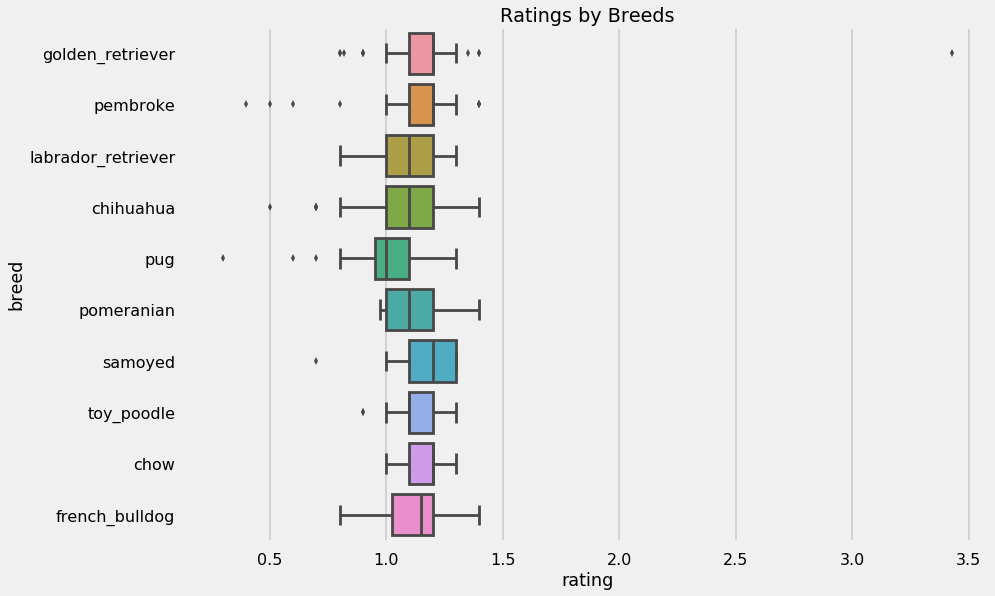

In [67]:
ax = sns.boxplot(data=df_top_breeds,
                 y="breed",
                 x="rating",
                 order=top_breeds,
                 orient='h')
plt.title("Ratings by Breeds")
plt.show()

Let's look at how many retweets + favorites tweets get when they include dogs from each of the top breeds. I'm using a log scale so we can get a better sense for distribution

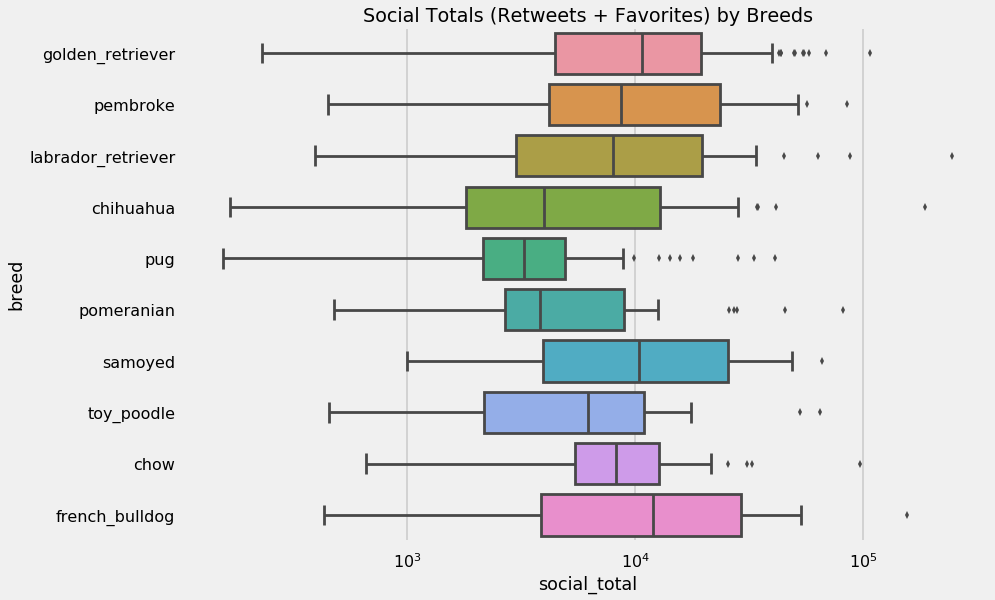

In [68]:
ax = sns.boxplot(data=df_top_breeds,
                 y="breed",
                 x="social_total",
                 order=top_breeds,
                 orient='h')
plt.title("Social Totals (Retweets + Favorites) by Breeds")
ax.set_xscale('log')
plt.show()

In [69]:
# Which breeds have the highest average number of retweets+favorites?
df_table = pd.DataFrame(df_top_breeds.groupby('breed').social_total.mean().sort_values(ascending=False))
df_table.rename(columns={'breed':'Breed','social_total':'Average social score'},inplace = True)
df_table.head(10)

,Average social score
breed,
french_bulldog,23057.954545
samoyed,17144.970588
labrador_retriever,16234.342105
golden_retriever,15527.016529
pembroke,14609.850000
chow,13734.428571
chihuahua,11394.363636
pomeranian,9873.588235
toy_poodle,9838.733333


In [70]:
# Which breeds have the highest median number of retweets+favorites?
df_top_breeds.groupby('breed').social_total.median().sort_values(ascending=False)

breed
french_bulldog        11928.0
golden_retriever      10653.0
samoyed               10386.0
pembroke               8681.5
chow                   8243.5
labrador_retriever     8001.0
toy_poodle             6186.0
chihuahua              3997.0
pomeranian             3831.5
pug                    3258.0
Name: social_total, dtype: float64

In [71]:
# Which breeds have the highest total number of retweets+favorites?
df_top_breeds.groupby('breed').social_total.sum().sort_values(ascending=False)

breed
golden_retriever      1878769
labrador_retriever    1233810
pembroke              1168788
chihuahua              626690
samoyed                582929
french_bulldog         507275
chow                   384564
pomeranian             335702
toy_poodle             295162
pug                    293064
Name: social_total, dtype: int64

### Question: Which individual dogs have received the most social feedback?

In [72]:
# I'm using dropna() here because I only want to include tweets that
# had a detected dog breed. Let's take the Top 5.
df2 = df_clean.dropna().sort_values(by='social_total', ascending=False).head(5)

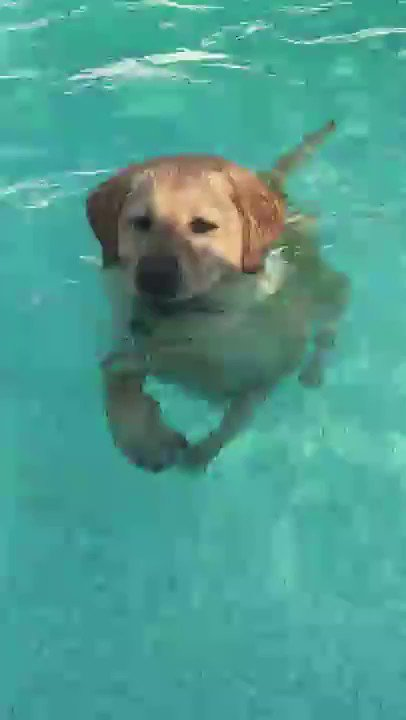

labrador_retriever 
social_total:  244427 
rating:  1.3  ( 13.0 / 10 )


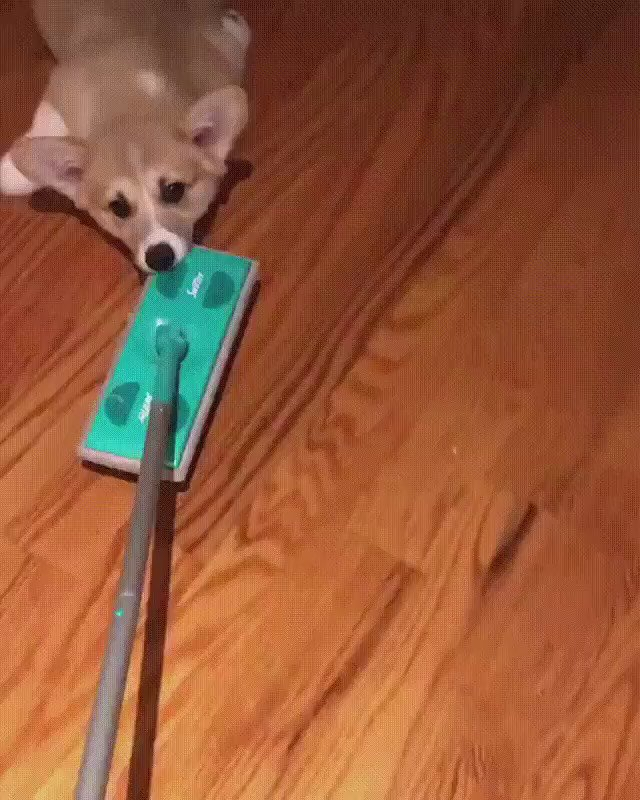

chihuahua 
social_total:  185335 
rating:  1.3  ( 13.0 / 10 )


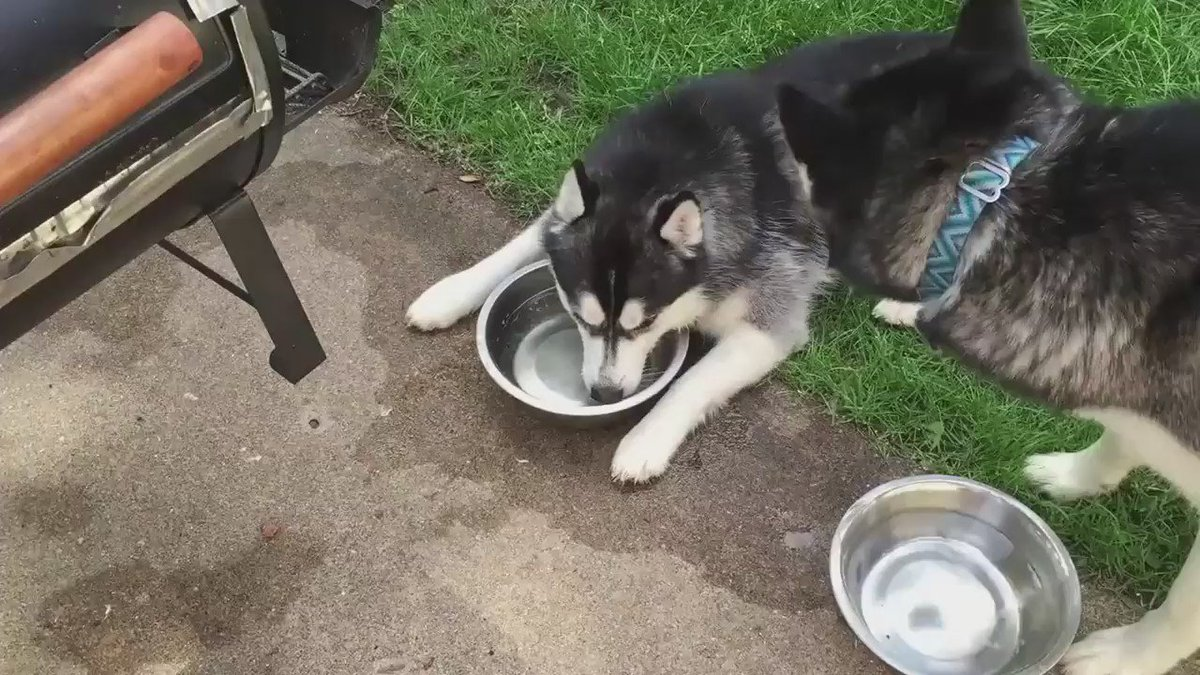

eskimo_dog 
social_total:  180780 
rating:  1.3  ( 13.0 / 10 )


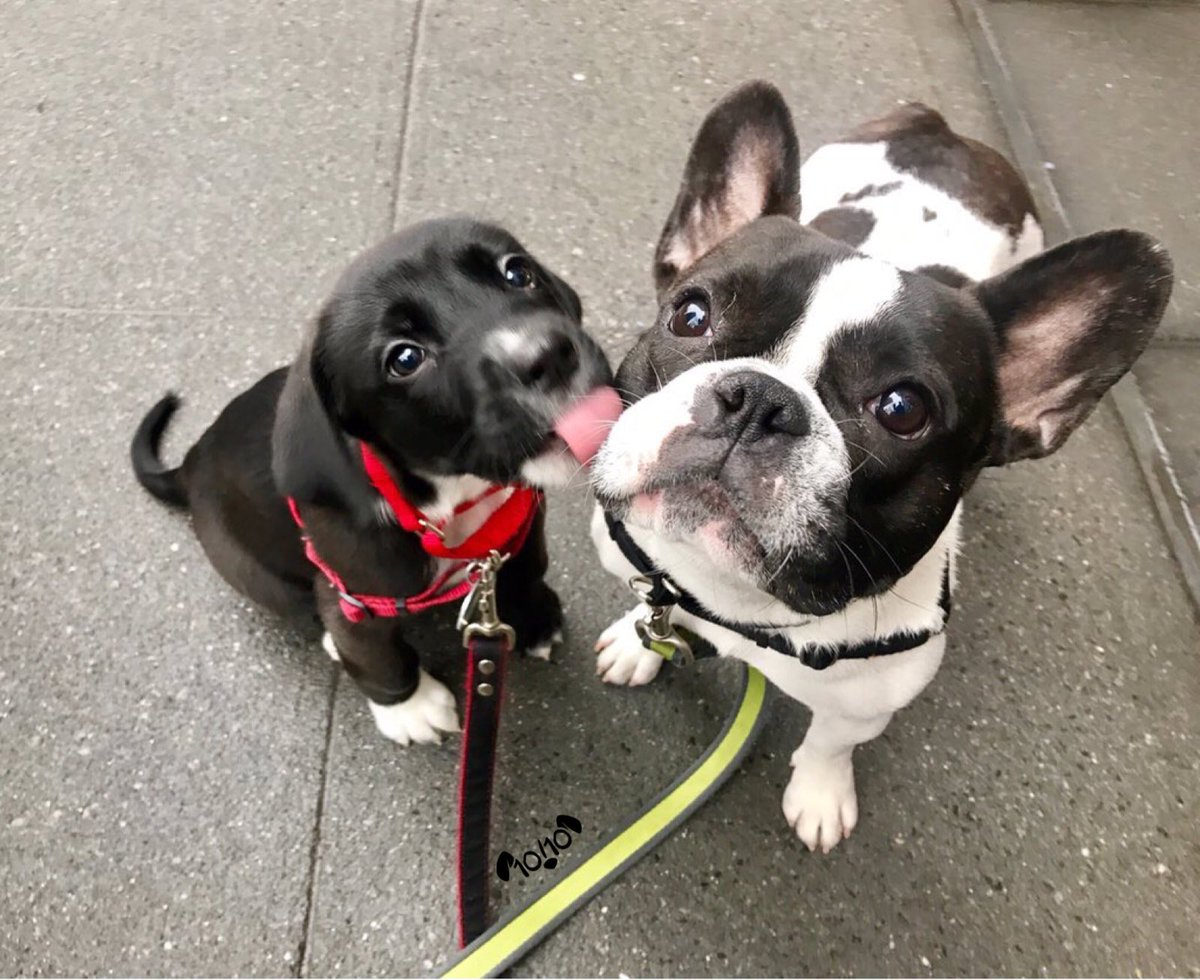

french_bulldog 
social_total:  155293 
rating:  1.3  ( 13.0 / 10 )


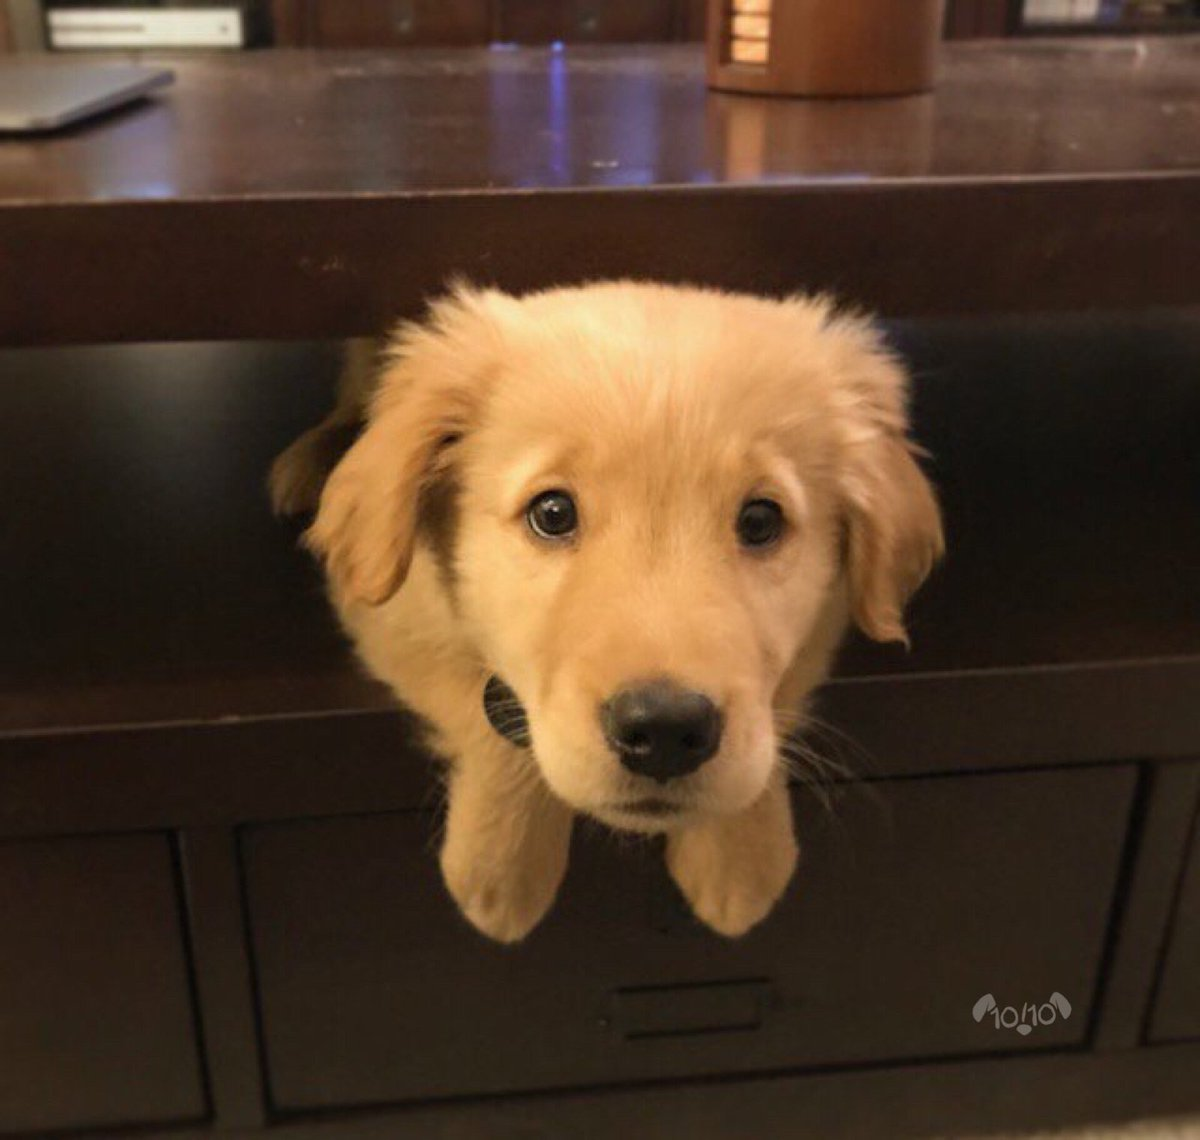

golden_retriever 
social_total:  106703 
rating:  1.3  ( 13.0 / 10 )


In [73]:
# Display the images
for i, j in df2.iterrows():
    img = Image(url=j['jpg_url'], format='jpg', width=200, embed=True)
    display(img)
    print(j['breed'], "\nsocial_total: ", j['social_total'], "\nrating: ",
          j['rating'], " (", j['rating_numerator'], "/",
          j['rating_denominator'], ")")